In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
sns.set()

In [4]:
%matplotlib inline

In [21]:
data = pd.read_csv("/Users/Stacy/Documents/WebDevelopment/projects/spd_project/crime_reporting/data/All_2016_to_11_28_2018.csv")
data = pd.DataFrame(data)

In [22]:
data.columns = ['cad_num', 'event_clearing', 'call_type', 'priority', 
                'initial_call_type', 'final_call_type', 'original_time_queued',
               'arrived_time', 'precinct', 'sector', 'beat']

In [23]:
data.head()

,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
0,2016000000002,ASSISTANCE RENDERED,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,01/01/2016 12:00:04 AM,Jan 1 2016 12:00:04:000AM,EAST,EDWARD,E1
1,2016000000001,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,01/01/2016 12:00:04 AM,Jan 1 2016 12:00:04:000AM,SOUTH,ROBERT,R3
2,2016000000003,ASSISTANCE RENDERED,ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,01/01/2016 12:00:06 AM,Jan 1 2016 12:00:06:000AM,SOUTH,OCEAN,O1
3,2015000451943,ASSISTANCE RENDERED,911,1,SHOTS - IP/JO - INCLUDES HEARD/NO ASSAULT,--DISTURBANCE - NOISE,01/01/2016 12:00:11 AM,Jan 1 2016 12:07:23:000AM,SOUTH,SAM,S3
4,2016000000004,ASSISTANCE RENDERED,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,01/01/2016 12:00:38 AM,Jan 1 2016 12:00:38:000AM,WEST,KING,K2


In [24]:
data.dtypes

cad_num                  int64
event_clearing          object
call_type               object
priority                 int64
initial_call_type       object
final_call_type         object
original_time_queued    object
arrived_time            object
precinct                object
sector                  object
beat                    object
dtype: object

In [29]:
data['original_time_queued'] = pd.to_datetime(data.original_time_queued)

In [27]:
data['arrived_time'] = pd.to_datetime(data.arrived_time, format='%b %d %Y %I:%M:%S:%f%p')

In [197]:
sexual_assault_terms = ['CSEC', 'LEWD', 'MOLESTING', 'STRANGER', 'ACQUAINTANCE']
sexual_assault_terms_joined = '|'.join(sexual_assault_terms)
sexual_assault_terms_joined

'CSEC|LEWD|MOLESTING|STRANGER|ACQUAINTANCE'

In [198]:
data['is_sexual_assault'] = data['final_call_type'].str.contains(sexual_assault_terms_joined, case=False)
data['is_rape'] = data['final_call_type'].str.contains('ACQUAINTANCE|STRANGER', case=False)


In [199]:
data.count()

cad_num                 1226233
event_clearing          1226233
call_type               1226233
priority                1226233
initial_call_type       1226233
final_call_type         1226233
original_time_queued    1226233
arrived_time            1226233
precinct                1226233
sector                  1218157
beat                    1226233
is_sexual_assault       1226233
is_rape                 1226233
dtype: int64

In [200]:
data.loc[data['is_sexual_assault'] == True, ['final_call_type', 'is_sexual_assault']]

,final_call_type,is_sexual_assault
209,--RAPE - UNKNOWN SUSPECT (STRANGER),True
348,--RAPE - UNKNOWN SUSPECT (STRANGER),True
402,--RAPE - UNKNOWN SUSPECT (STRANGER),True
597,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,True
747,--SEX OFFENSES (RAPE) - MOLESTING,True
826,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),True
1052,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),True
1112,--RAPE - UNKNOWN SUSPECT (STRANGER),True
1294,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,True
1999,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",True


In [148]:
# Need to confirm with SPD: call type 'sex offense (rape) - molesting'
# 6069 rows × 2 columns
data.loc[data['is_rape'] == True, ['final_call_type', 'is_rape']]

,final_call_type,is_rape
209,--RAPE - UNKNOWN SUSPECT (STRANGER),True
348,--RAPE - UNKNOWN SUSPECT (STRANGER),True
402,--RAPE - UNKNOWN SUSPECT (STRANGER),True
826,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),True
1052,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),True
1112,--RAPE - UNKNOWN SUSPECT (STRANGER),True
3635,--RAPE - UNKNOWN SUSPECT (STRANGER),True
4187,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),True
4391,--RAPE - UNKNOWN SUSPECT (STRANGER),True
4867,--RAPE - UNKNOWN SUSPECT (STRANGER),True


In [149]:
data.dtypes

cad_num                          int64
event_clearing                  object
call_type                       object
priority                         int64
initial_call_type               object
final_call_type                 object
original_time_queued    datetime64[ns]
arrived_time            datetime64[ns]
precinct                        object
sector                          object
beat                            object
is_sexual_assault                 bool
is_rape                           bool
dtype: object

In [201]:
# Make histogram reflecting sexual assault type by month, year
plot = [go.Hist(x=data.original_time_queued, y=data['is_sexual_assault'])]
py.iplot(plot)

AttributeError: module 'plotly.graph_objs' has no attribute 'Hist'

In [ ]:
# Histogram: total count of all sexual assaults by beat and city (per year, month)

In [ ]:
# Histogram: pick ~5 sexual assault types and display count by beat

In [226]:
series = data['final_call_type'].value_counts()
series.head(10)

--PREMISE CHECKS - CRIME PREVENTION                108655
--DISTURBANCE - OTHER                               95268
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON            90126
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)     65599
--TRAFFIC - MOVING VIOLATION                        63475
--TRAFFIC - MV COLLISION INVESTIGATION              53758
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)             51550
-OFF DUTY EMPLOYMENT                                44736
--PROWLER - TRESPASS                                37122
--CRISIS COMPLAINT - GENERAL                        30088
Name: final_call_type, dtype: int64

In [206]:
is_sexual_assault = data[data.is_sexual_assault == True]
is_sexual_assault[data.precinct == 'NORTH']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,is_sexual_assault,is_rape
209,2016000000258,REPORT WRITTEN (NO ARREST),911,2,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-01 03:42:36,2016-01-01 04:35:57,NORTH,JOHN,J3,True,True
747,2016000000868,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,RAPE,--SEX OFFENSES (RAPE) - MOLESTING,2016-01-01 18:25:39,2016-01-01 18:37:23,NORTH,BOY,B1,True,False
826,2016000000970,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-01 20:38:45,2016-01-01 20:45:36,NORTH,UNION,U3,True,True
1112,2016000001291,ASSISTANCE RENDERED,ONVIEW,3,FOLLOW UP,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-02 04:49:40,2016-01-02 04:49:40,NORTH,BOY,B1,True,True
2219,2016000002535,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-03 10:22:47,2016-01-03 10:45:24,NORTH,LINCOLN,L1,True,False
2481,2016000002834,REPORT WRITTEN (NO ARREST),911,3,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-03 16:35:40,2016-01-03 17:10:20,NORTH,NORA,N3,True,False
2557,2016000002923,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-03 19:03:07,2016-01-03 19:18:08,NORTH,LINCOLN,L2,True,False
8706,2016000009884,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-09 10:30:35,2016-01-09 13:47:23,NORTH,NORA,N1,True,True
10104,2016000011496,REPORT WRITTEN (NO ARREST),911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-10 21:25:44,2016-01-10 21:27:49,NORTH,UNION,U1,True,False
11861,2016000013480,FOLLOW-UP REPORT MADE,911,2,FOLLOW UP,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-12 13:46:42,2016-01-12 14:17:46,NORTH,UNION,U2,True,True


In [203]:
is_sexual_assault[data.precinct == 'EAST']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,is_sexual_assault,is_rape
597,2016000000695,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-01 15:33:32,2016-01-01 15:40:23,EAST,EDWARD,E3,True,False
3635,2016000004130,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-04 20:36:07,2016-01-04 20:43:36,EAST,GEORGE,G1,True,True
4867,2016000005515,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-06 03:00:04,2016-01-06 08:15:32,EAST,EDWARD,E2,True,True
5256,2016000005958,ASSISTANCE RENDERED,ONVIEW,3,FOLLOW UP,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-06 11:51:07,2016-01-06 11:51:07,EAST,EDWARD,E2,True,False
6403,2016000007251,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-07 09:54:09,2016-01-07 09:59:20,EAST,GEORGE,G1,True,True
7312,2016000008283,REPORT WRITTEN (NO ARREST),911,2,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-08 02:14:45,2016-01-08 02:17:27,EAST,GEORGE,G1,True,True
7796,2016000008843,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-08 14:03:00,1900-01-01 00:00:00,EAST,EDWARD,E1,True,False
8370,2016000009500,ORAL WARNING GIVEN,ONVIEW,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-08 23:37:50,2016-01-08 23:37:50,EAST,EDWARD,E2,True,False
8380,2016000009512,ORAL WARNING GIVEN,ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-08 23:46:54,2016-01-08 23:46:54,EAST,EDWARD,E2,True,False
15193,2016000017302,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-15 13:37:39,2016-01-15 13:48:12,EAST,GEORGE,G1,True,True


In [204]:
is_sexual_assault[data.precinct == 'SOUTH']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,is_sexual_assault,is_rape
1052,2016000001225,REPORT WRITTEN (NO ARREST),ONVIEW,3,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-02 02:14:08,2016-01-02 02:14:08,SOUTH,SAM,S3,True,True
4391,2016000004963,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-05 15:28:36,2016-01-05 15:28:36,SOUTH,SAM,S2,True,True
6733,2016000007619,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-07 14:26:02,2016-01-07 14:55:28,SOUTH,ROBERT,R1,True,False
9245,2016000010520,REPORT WRITTEN (NO ARREST),911,2,SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION),--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-09 22:27:57,2016-01-09 22:32:29,SOUTH,SAM,S1,True,False
10678,2016000012126,REPORT WRITTEN (NO ARREST),911,3,"HARAS - NO BIAS, THREATS OR MALICIOUSNESS",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-11 12:26:34,2016-01-11 12:33:18,SOUTH,ROBERT,R2,True,False
13787,2016000015685,PHYSICAL ARREST MADE,911,2,"DISTURBANCE, MISCELLANEOUS/OTHER",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-14 08:46:30,2016-01-14 08:58:37,SOUTH,ROBERT,R2,True,True
20445,2016000023223,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)","LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",2016-01-20 13:55:59,2016-01-20 14:17:03,SOUTH,ROBERT,R2,True,False
20470,2016000023249,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-20 14:14:43,2016-01-20 14:18:43,SOUTH,SAM,S2,True,False
20647,2016000023456,REPORT WRITTEN (NO ARREST),ONVIEW,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-20 16:56:20,2016-01-20 16:56:20,SOUTH,ROBERT,R1,True,False
22897,2016000026001,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-22 15:52:23,2016-01-22 16:07:56,SOUTH,OCEAN,O3,True,False


In [251]:
is_sexual_assault[data.precinct == 'WEST']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,is_sexual_assault,is_rape
348,2016000000423,REPORT WRITTEN (NO ARREST),911,1,RAPE - IP/JO,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-01 10:09:18,2016-01-01 10:17:47,WEST,KING,K3,True,True
1999,2016000002296,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),ONVIEW,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)","LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",2016-01-03 02:34:39,2016-01-03 02:34:39,WEST,DAVID,D1,True,False
2757,2016000003146,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,2,"ASLT - MOLESTED ADULT (GROPED, FONDLED, ETC.)",--SEX OFFENSES (RAPE) - MOLESTING,2016-01-03 23:59:43,2016-01-04 00:07:41,WEST,KING,K2,True,False
4187,2016000004735,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-05 12:15:01,2016-01-05 12:34:40,WEST,QUEEN,Q3,True,True
4597,2016000005192,REPORT WRITTEN (NO ARREST),911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-05 18:33:44,2016-01-05 19:57:25,WEST,DAVID,D3,True,False
8675,2016000009848,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),ONVIEW,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)","LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",2016-01-09 09:47:03,2016-01-09 09:47:03,WEST,MARY,M3,True,False
9518,2016000010830,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-10 07:01:59,2016-01-10 07:06:45,WEST,DAVID,D1,True,False
9677,2016000011002,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-10 11:55:16,2016-01-10 11:58:59,WEST,KING,K3,True,False
11110,2016000012630,REPORT WRITTEN (NO ARREST),ONVIEW,1,CHILD - IP/JO - LURING,--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC),2016-01-11 19:19:59,2016-01-11 19:19:59,WEST,MARY,M3,True,False
16012,2016000018232,ASSISTANCE RENDERED,911,2,SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION),--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-16 05:09:06,2016-01-16 05:18:59,WEST,DAVID,D1,True,False


In [262]:
is_sexual_assault.dtypes

cad_num                          int64
event_clearing                  object
call_type                       object
priority                         int64
initial_call_type               object
final_call_type                 object
original_time_queued    datetime64[ns]
arrived_time            datetime64[ns]
precinct                        object
sector                          object
beat                            object
is_sexual_assault                 bool
is_rape                           bool
dtype: object

In [282]:
is_sexual_assault = pd.DataFrame(is_sexual_assault)

In [292]:
# Access df by precinct
sexual_assault_north = is_sexual_assault[is_sexual_assault.precinct == "NORTH"]
sexual_assault_east = is_sexual_assault[is_sexual_assault.precinct == "EAST"]
sexual_assault_south = is_sexual_assault[is_sexual_assault.precinct == "SOUTH"]
sexual_assault_west = is_sexual_assault[is_sexual_assault.precinct == "WEST"]

In [ ]:
# Histogram by precinct


In [281]:
sexual_assault_type = is_sexual_assault[['final_call_type', 'arrived_time']]
sexual_assault_type_groupby = sexual_assault_type.groupby(is_sexual_assault['arrived_time'].dt.month)
sexual_assault_type_groupby.head()

,final_call_type,arrived_time
209,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-01 04:35:57
348,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-01 10:17:47
402,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-01 12:36:53
597,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-01-01 15:40:23
747,--SEX OFFENSES (RAPE) - MOLESTING,2016-01-01 18:37:23
32870,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-02-01 02:07:31
33356,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-02-01 16:05:11
33366,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-02-01 13:23:38
33912,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2016-02-02 04:18:32
33941,--SEX OFFENSES (RAPE) - MOLESTING,2016-02-02 05:33:21


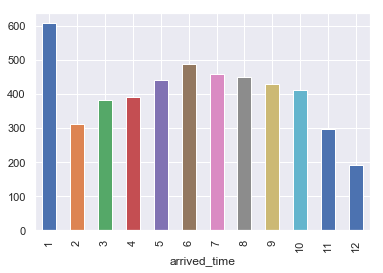

In [294]:
# All sexual assaults - count by all months
sexual_assault_type_groupby['final_call_type'].count().plot(kind='bar', legend=None)


In [213]:
is_rape = data[data.is_rape == True]
# Q's: What's with all of the onview rapes? 
#If an arrest is made in the following days, do all officers change the clearing code of the original call?
# What's the meaning of one of these calls being cleared "f/up repot made"?
# Rape with known suspect: why would these be cleared UTL?
# Why would final_call_type be rape, but the cc "INCIDENT LOCATED, PUBLIC ORDER RESTORED"?


In [208]:
is_rape[data.precinct == 'NORTH']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,is_sexual_assault,is_rape
209,2016000000258,REPORT WRITTEN (NO ARREST),911,2,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-01 03:42:36,2016-01-01 04:35:57,NORTH,JOHN,J3,True,True
826,2016000000970,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-01 20:38:45,2016-01-01 20:45:36,NORTH,UNION,U3,True,True
1112,2016000001291,ASSISTANCE RENDERED,ONVIEW,3,FOLLOW UP,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-02 04:49:40,2016-01-02 04:49:40,NORTH,BOY,B1,True,True
8706,2016000009884,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-09 10:30:35,2016-01-09 13:47:23,NORTH,NORA,N1,True,True
11861,2016000013480,FOLLOW-UP REPORT MADE,911,2,FOLLOW UP,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-12 13:46:42,2016-01-12 14:17:46,NORTH,UNION,U2,True,True
13379,2016000015224,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-13 20:29:51,2016-01-13 21:42:29,NORTH,UNION,U2,True,True
13638,2016000015516,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-14 04:44:50,2016-01-14 05:10:47,NORTH,NORA,N1,True,True
18691,2016000021249,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-18 22:46:03,2016-01-18 23:04:31,NORTH,BOY,B3,True,True
21954,2016000024942,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-21 19:46:29,2016-01-21 19:46:29,NORTH,NORA,N3,True,True
34798,2016000039720,REPORT WRITTEN (NO ARREST),911,1,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-02-02 18:51:40,2016-02-02 19:16:38,NORTH,JOHN,J1,True,True


In [209]:
is_rape[data.precinct == 'EAST']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,is_sexual_assault,is_rape
3635,2016000004130,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-04 20:36:07,2016-01-04 20:43:36,EAST,GEORGE,G1,True,True
4867,2016000005515,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-06 03:00:04,2016-01-06 08:15:32,EAST,EDWARD,E2,True,True
6403,2016000007251,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-07 09:54:09,2016-01-07 09:59:20,EAST,GEORGE,G1,True,True
7312,2016000008283,REPORT WRITTEN (NO ARREST),911,2,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-08 02:14:45,2016-01-08 02:17:27,EAST,GEORGE,G1,True,True
15193,2016000017302,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-15 13:37:39,2016-01-15 13:48:12,EAST,GEORGE,G1,True,True
18939,2016000021518,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-19 07:59:16,2016-01-19 09:10:15,EAST,GEORGE,G1,True,True
21841,2016000024811,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-21 17:37:17,2016-01-21 17:47:53,EAST,GEORGE,G2,True,True
22319,2016000025356,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",1,RAPE - IP/JO,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-22 07:02:57,2016-01-22 07:10:51,EAST,EDWARD,E3,True,True
23383,2016000026576,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-23 00:00:15,2016-01-23 00:13:13,EAST,GEORGE,G1,True,True
28260,2016000032125,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-27 16:39:54,2016-01-27 17:04:08,EAST,EDWARD,E2,True,True


In [210]:
is_rape[data.precinct == 'SOUTH']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,is_sexual_assault,is_rape
1052,2016000001225,REPORT WRITTEN (NO ARREST),ONVIEW,3,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-02 02:14:08,2016-01-02 02:14:08,SOUTH,SAM,S3,True,True
4391,2016000004963,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-05 15:28:36,2016-01-05 15:28:36,SOUTH,SAM,S2,True,True
13787,2016000015685,PHYSICAL ARREST MADE,911,2,"DISTURBANCE, MISCELLANEOUS/OTHER",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-14 08:46:30,2016-01-14 08:58:37,SOUTH,ROBERT,R2,True,True
29665,2016000033807,PHYSICAL ARREST MADE,911,1,UNKNOWN - COMPLAINT OF UNKNOWN NATURE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-28 22:41:28,2016-01-28 22:50:01,SOUTH,ROBERT,R1,True,True
34918,2016000039863,REPORT WRITTEN (NO ARREST),911,1,RAPE - IP/JO,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-02-02 21:01:08,2016-02-02 21:08:30,SOUTH,ROBERT,R1,True,True
47386,2016000054052,PHYSICAL ARREST MADE,911,3,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-02-14 08:17:07,2016-02-14 08:20:27,SOUTH,SAM,S1,True,True
59009,2016000067580,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-02-25 12:51:36,2016-02-25 12:51:36,SOUTH,SAM,S1,True,True
65249,2016000074698,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-03-02 09:33:25,2016-03-02 09:33:25,SOUTH,SAM,S2,True,True
66200,2016000075796,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-03-03 04:18:17,2016-03-03 04:18:17,SOUTH,SAM,S1,True,True
68759,2016000078663,REPORT WRITTEN (NO ARREST),911,1,DIST - IP/JO - DV DIST - NO ASLT,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-03-05 10:07:32,2016-03-05 10:11:36,SOUTH,ROBERT,R2,True,True


In [211]:
is_rape[data.precinct == 'WEST']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,is_sexual_assault,is_rape
348,2016000000423,REPORT WRITTEN (NO ARREST),911,1,RAPE - IP/JO,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-01-01 10:09:18,2016-01-01 10:17:47,WEST,KING,K3,True,True
4187,2016000004735,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-05 12:15:01,2016-01-05 12:34:40,WEST,QUEEN,Q3,True,True
17763,2016000020201,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,1,RAPE - IP/JO,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-17 23:10:04,2016-01-17 23:12:28,WEST,KING,K3,True,True
21387,2016000024302,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,"CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-21 10:50:04,2016-01-21 13:48:15,WEST,QUEEN,Q2,True,True
23196,2016000026352,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-22 20:52:46,2016-01-22 21:04:08,WEST,KING,K1,True,True
46395,2016000052935,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-02-13 09:17:49,2016-02-13 09:30:00,WEST,QUEEN,Q1,True,True
55720,2016000063522,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-02-22 11:40:55,2016-02-22 11:40:55,WEST,MARY,M2,True,True
57532,2016000065905,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2016-02-24 06:33:14,2016-02-24 06:33:14,WEST,DAVID,D2,True,True
68143,2016000077967,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",5,TRU - ASLT - WITH OR W/O WPNS (NO SHOOTINGS),--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-03-04 17:34:56,2016-03-04 17:36:28,WEST,KING,K1,True,True
73260,2016000083747,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-03-09 15:05:13,2016-03-09 15:05:13,WEST,QUEEN,Q3,True,True


In [212]:
is_rape[data.event_clearing == 'PHYSICAL ARREST MADE']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,is_sexual_assault,is_rape
13787,2016000015685,PHYSICAL ARREST MADE,911,2,"DISTURBANCE, MISCELLANEOUS/OTHER",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-14 08:46:30,2016-01-14 08:58:37,SOUTH,ROBERT,R2,True,True
29665,2016000033807,PHYSICAL ARREST MADE,911,1,UNKNOWN - COMPLAINT OF UNKNOWN NATURE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-01-28 22:41:28,2016-01-28 22:50:01,SOUTH,ROBERT,R1,True,True
34341,2016000039203,PHYSICAL ARREST MADE,"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-02-02 12:44:44,2016-02-02 12:51:03,EAST,EDWARD,E3,True,True
40285,2016000046009,PHYSICAL ARREST MADE,911,2,ASLT - DV,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-02-07 18:34:36,2016-02-07 18:47:00,EAST,EDWARD,E1,True,True
47386,2016000054052,PHYSICAL ARREST MADE,911,3,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-02-14 08:17:07,2016-02-14 08:20:27,SOUTH,SAM,S1,True,True
78858,2016000090585,PHYSICAL ARREST MADE,"TELEPHONE OTHER, NOT 911",2,"DISTURBANCE, MISCELLANEOUS/OTHER",--RAPE - UNKNOWN SUSPECT (STRANGER),2016-03-15 01:51:29,2016-03-15 02:02:47,NORTH,BOY,B1,True,True
92313,2016000106096,PHYSICAL ARREST MADE,911,1,RAPE - IP/JO,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-03-27 18:14:25,2016-03-27 18:17:32,SOUTH,SAM,S1,True,True
94935,2016000109048,PHYSICAL ARREST MADE,911,2,SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION),--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-03-30 08:31:24,2016-03-30 08:36:37,SOUTH,OCEAN,O3,True,True
107153,2016000123074,PHYSICAL ARREST MADE,911,1,"ASLT - MOLESTED ADULT (GROPED, FONDLED, ETC.)",--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-04-09 20:50:14,2016-04-09 20:54:51,WEST,MARY,M1,True,True
107945,2016000123980,PHYSICAL ARREST MADE,911,1,RAPE - IP/JO,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2016-04-10 18:02:34,2016-04-10 18:04:31,NORTH,NORA,N2,True,True


In [222]:
# Create is_violent_crime column
violent_crime_terms = ['FIREARM INVOLVED', 'DRIVE BY SHOOTING', 'HOMICIDE', 'KIDNAP - GENERAL', 'ROBBERY - ARMED']
violent_crime_terms_joined = '|'.join(violent_crime_terms)
violent_crime_terms_joined

'FIREARM INVOLVED|DRIVE BY SHOOTING|HOMICIDE|KIDNAP - GENERAL|ROBBERY - ARMED'

In [217]:
data['is_violent_crime'] = data['final_call_type'].str.contains(violent_crime_terms_joined, case=False)

In [221]:
# Contains all rows for violent crimes (FIREARM INVOLVED, DRIVE BY SHOOTING, HOMICIDE, KIDNAP - GENERAL, ROBBERY - ARMED)
is_violent_crime = data[data.is_violent_crime == True]
is_violent_crime

,cad_num,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,is_sexual_assault,is_rape,is_violent_crime
202,2016000000251,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,ASLT - PERSON SHOT OR SHOT AT,--ASSAULTS - FIREARM INVOLVED,2016-01-01 03:31:21,2016-01-01 04:03:25,UNKNOWN,NaN,S,False,False,True
591,2016000000689,ASSISTANCE RENDERED,ONVIEW,3,FOLLOW UP,--ROBBERY - ARMED,2016-01-01 15:28:17,2016-01-01 15:28:17,SOUTH,OCEAN,O2,False,False,True
1670,2016000001937,REPORT WRITTEN (NO ARREST),911,1,ASLT - IP/JO - PERSON SHOT OR SHOT AT,--ASSAULTS - FIREARM INVOLVED,2016-01-02 20:07:45,2016-01-02 20:09:00,SOUTH,SAM,S2,False,False,True
2005,2016000002305,REPORT WRITTEN (NO ARREST),911,1,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,2016-01-03 02:45:37,2016-01-03 02:49:01,SOUTHWEST,FRANK,F2,False,False,True
2103,2016000002408,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ROBBERY - ARMED,2016-01-03 06:39:44,2016-01-03 06:39:44,EAST,GEORGE,G1,False,False,True
2160,2016000002471,ASSISTANCE RENDERED,911,1,SUICIDE - IP/JO SUICIDAL PERSON AND ATTEMPTS,--ASSAULTS - FIREARM INVOLVED,2016-01-03 08:55:04,2016-01-03 09:03:16,WEST,KING,K3,False,False,True
2790,2016000003180,REPORT WRITTEN (NO ARREST),911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,2016-01-04 00:49:00,2016-01-04 00:54:39,NORTH,NORA,N2,False,False,True
2886,2016000003288,REPORT WRITTEN (NO ARREST),911,2,ROBBERY (INCLUDES STRONG ARM),--ROBBERY - ARMED,2016-01-04 06:00:27,2016-01-04 06:15:11,NORTH,BOY,B3,False,False,True
3236,2016000003674,REPORT WRITTEN (NO ARREST),911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ROBBERY - ARMED,2016-01-04 13:08:23,2016-01-04 13:10:01,WEST,KING,K2,False,False,True
3537,2016000004017,REPORT WRITTEN (NO ARREST),911,1,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,2016-01-04 18:23:11,2016-01-04 18:32:04,NORTH,LINCOLN,L2,False,False,True
